<a href="https://colab.research.google.com/github/Maria-Naveen/Face-Mask-Detection/blob/main/MaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

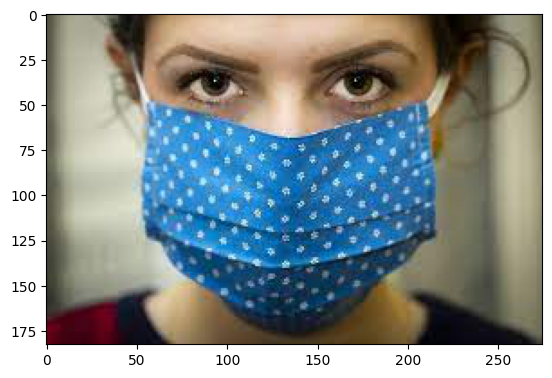

In [ ]:
img=image.load_img("/content/drive/MyDrive/aiml/project mask/training/mask/1.jpg")
plt.imshow(img)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/aiml/project mask/training',target_size=(200,200),batch_size=3,class_mode='binary')

Found 110 images belonging to 2 classes.


In [ ]:
validation_dataset=train.flow_from_directory('/content/drive/MyDrive/aiml/project mask/validation',target_size=(200,200),batch_size=3,class_mode='binary')

Found 110 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'mask': 0, 'without mask': 1}

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=80,
                    validation_data=validation_dataset)

Epoch 1/80
3/3 [==============================] - 4s 2s/step - loss: 0.2763 - accuracy: 0.7500 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 2/80
3/3 [==============================] - 4s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 3/80
3/3 [==============================] - 4s 2s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 4/80
3/3 [==============================] - 5s 2s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 5/80
3/3 [==============================] - 4s 2s/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9909
Epoch 6/80
3/3 [==============================] - 4s 2s/step - loss: 0.1015 - accuracy: 0.8889 - val_loss: 1.2223 - val_accuracy: 0.7455
Epoch 7/80
3/3 [==============================] - 5s 2s/step - loss: 0.2494 - accuracy: 0.8889 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 8/80
3/3 [=========================

KeyboardInterrupt: ignored

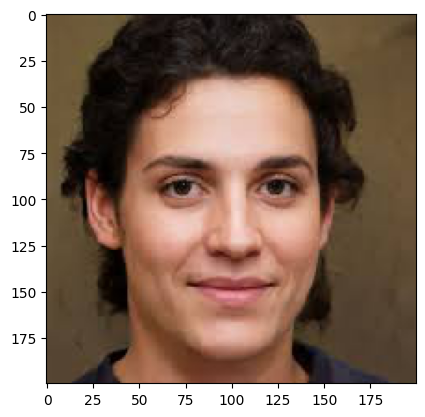

1/1 [==============================] - 0s 71ms/step
Without mask


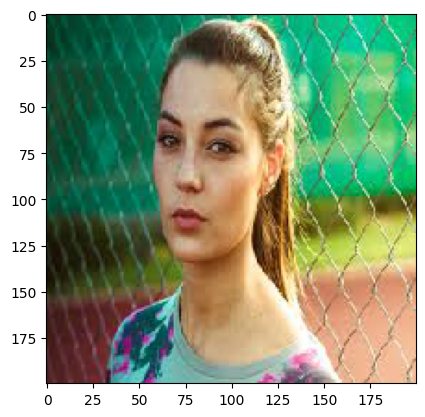

1/1 [==============================] - 0s 89ms/step
Without mask


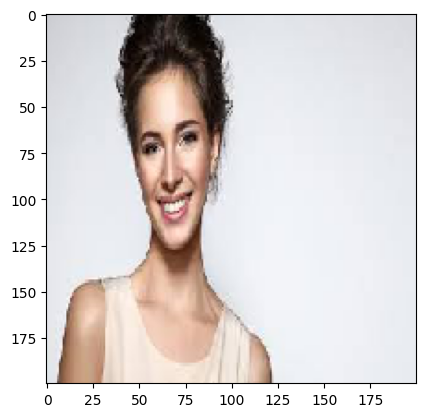

1/1 [==============================] - 0s 65ms/step
Without mask


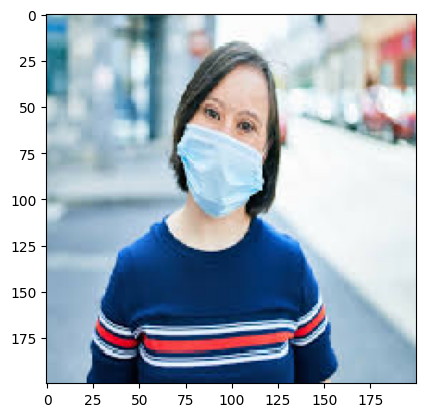

1/1 [==============================] - 0s 74ms/step
With mask


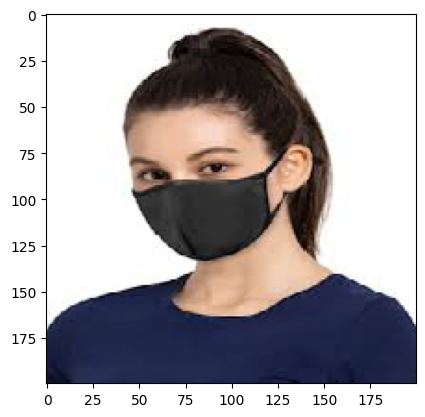

1/1 [==============================] - 0s 81ms/step
Without mask


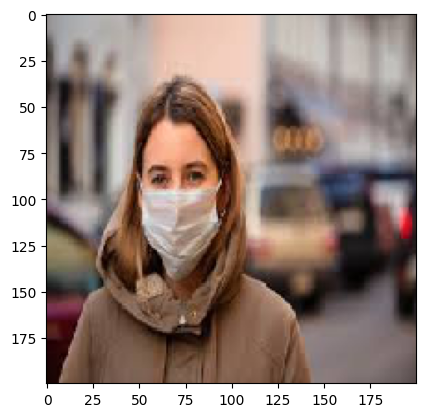

1/1 [==============================] - 0s 74ms/step
Without mask


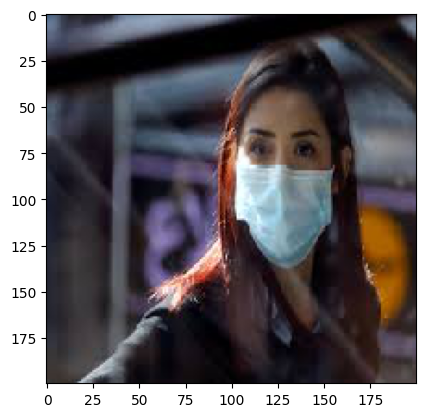

1/1 [==============================] - 0s 45ms/step
Without mask


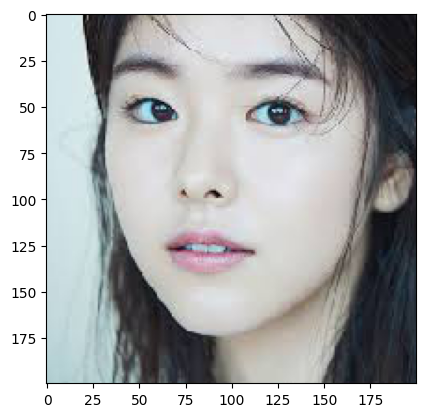

1/1 [==============================] - 0s 46ms/step
With mask


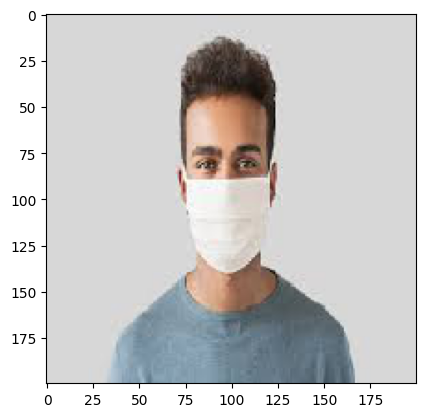

1/1 [==============================] - 0s 42ms/step
With mask


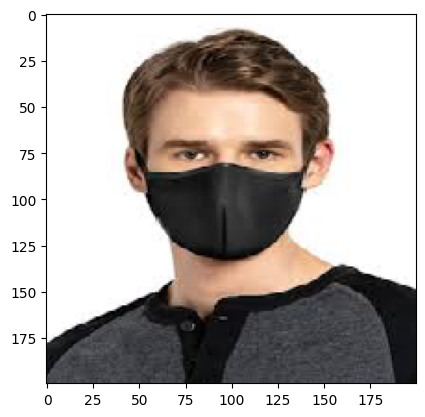

1/1 [==============================] - 0s 48ms/step
Without mask


In [ ]:
dir_path ='/content/drive/MyDrive/aiml/project mask/testing'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()
  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images=np.vstack([X])
  val=model.predict(images)
  if val ==1:
    print("Without mask")
  else:
    print("With mask")